Inpiration for the code:
https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/


In this part we will import the useful packages:

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Read the dataset
df = pd.read_csv("ProtParamExpressedCopy.csv")
df

,trial_sequence,bio_isoelectric_point,bio_molecular_weight,bio_aromaticity,bio_instability,bio_gravy,prot_flexibility,sequence_length,helix_fraction,turn_fraction,...,polar_aa_percent,hydrophobic_aa_percent,frac_aliphatic,frac_uncharged_polar,frac_positive,frac_sulfur,frac_negative,frac_amide,frac_alcohol,trial_status
0,MSSSPVKRQRMESALDQLKQFTTVVADTGDFHAIDEYKPQDATTNP...,6.355986,37539.6793,0.077151,34.957567,-0.250445,1.003072,337,0.296736,0.181009,...,0.270030,0.456973,0.415430,0.181009,0.151335,0.035608,0.139466,0.071217,0.109792,expressed
1,MAASLVGKKIVFVTGNAKKLEEVVQILGDKFPCTLVAQKIDLPEYQ...,5.503799,21445.4220,0.097938,32.807216,-0.170103,1.001438,194,0.309278,0.211340,...,0.257732,0.510309,0.453608,0.159794,0.118557,0.046392,0.123711,0.082474,0.077320,expressed
2,MPRYELALILKAMQRPETAATLKRTIEALMDRGAIVRDLENLGERA...,9.298098,14226.3961,0.056000,37.828080,-0.368800,0.998682,125,0.296000,0.168000,...,0.256000,0.456000,0.440000,0.144000,0.192000,0.040000,0.128000,0.056000,0.088000,expressed
3,MAVCGLGSRLGLGSRLGLRGCFGAARLLYPRFQSRGPQGVEDGDRP...,8.859777,27387.9391,0.080000,40.756800,-0.348000,1.003691,250,0.264000,0.240000,...,0.288000,0.468000,0.420000,0.204000,0.144000,0.040000,0.112000,0.060000,0.144000,expressed
4,MATELQCPDSMPCHNQQVNSASTPSPEQLRPGDLILDHAGGNRASR...,5.707169,33786.0793,0.061489,51.529126,-0.255016,1.002304,309,0.278317,0.268608,...,0.336570,0.449838,0.420712,0.229773,0.119741,0.051780,0.116505,0.080906,0.148867,expressed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,ASVIPASNRSMRSDRNTYVGKRFVHVKNPYLDLMDEDILYHLDLGT...,6.228440,35395.7462,0.079114,40.417437,0.011709,0.993796,316,0.325949,0.199367,...,0.294304,0.465190,0.414557,0.158228,0.145570,0.075949,0.126582,0.053797,0.104430,not expressed
2617,AAAAAAGEARRVLVYGGRGALGSRCVQAFRARNWWVASVDVVENEE...,7.104613,25658.0213,0.069959,25.499588,-0.003704,1.000288,243,0.267490,0.246914,...,0.308642,0.502058,0.473251,0.205761,0.111111,0.045267,0.094650,0.057613,0.148148,not expressed
2618,SCPNYCSGNSNSGSLRTSRHIPLTSIDLCPTSVSCGDVLYLPTSSQ...,8.027942,22423.0737,0.071770,65.528230,-0.231579,0.996169,209,0.239234,0.392344,...,0.511962,0.387560,0.358852,0.344498,0.081340,0.100478,0.043062,0.095694,0.248804,not expressed
2619,SLCEDMLLCNYRKCRIKLSGYAWVTACSHIFCDQHGSGEFSRSPAI...,8.586947,31412.3874,0.097826,52.909783,-0.509783,1.004917,276,0.282609,0.253623,...,0.358696,0.394928,0.340580,0.246377,0.148551,0.050725,0.115942,0.097826,0.148551,not expressed


In [12]:
# standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

features = []

# Separating out the features
x = df.drop(['trial_status', 'trial_sequence'],axis=1).values

# Separating out the target
y = df.loc[:,['trial_status']].values.ravel()
y = LabelEncoder().fit(y).transform(y)

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [13]:
# df['trial_status'] =df['trial_status'].astype('category').cat.codes
# df.to_csv("Encoded.csv", index = False)
y
# we have 0 as expressed, and 1 as not expressed

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# First method
First approach is using just A Logistic Regression Model and split the whole data into 70%-30%

The f1 score for the testing data: 0.3230769230769231


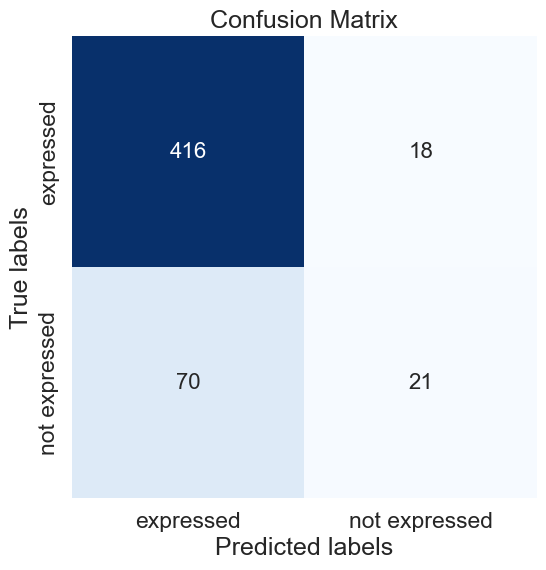

In [15]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)


# Predicting on the test data
pred_test = lr.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test, title='Confusion matrix'):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    s = sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    # labels, title and ticks
    s.set_xlabel('Predicted labels');s.set_ylabel('True labels'); 
    s.set_title('Confusion Matrix'); 
    s.xaxis.set_ticklabels(['expressed', 'not expressed']); s.yaxis.set_ticklabels(['expressed', 'not expressed'])



#Calling function 
conf_matrix(y_test, pred_test)

In [16]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_test))

Accuracy: 0.8323809523809523


# Second method, using class_weight = "balanced"

Trying with class_weight = "balanced". This would introduce a lot of missclassifications
The cost of classying correctly more negatives is that we introduce a lot of missclassifications for postives class

The f1 score for the testing data: 0.4344827586206897


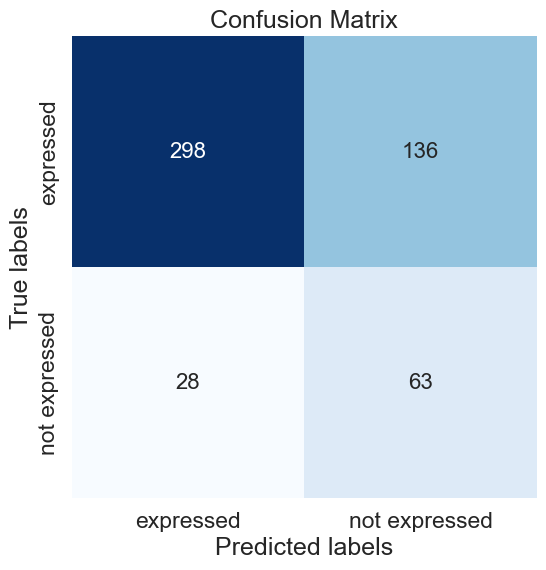

In [17]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)




In [18]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_test))

Accuracy: 0.6876190476190476


# Third method
# Trying a grid search method to search for the best weights 
Manually asses class weight with 5 folds grid search, we will select the range from 0 to 1


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

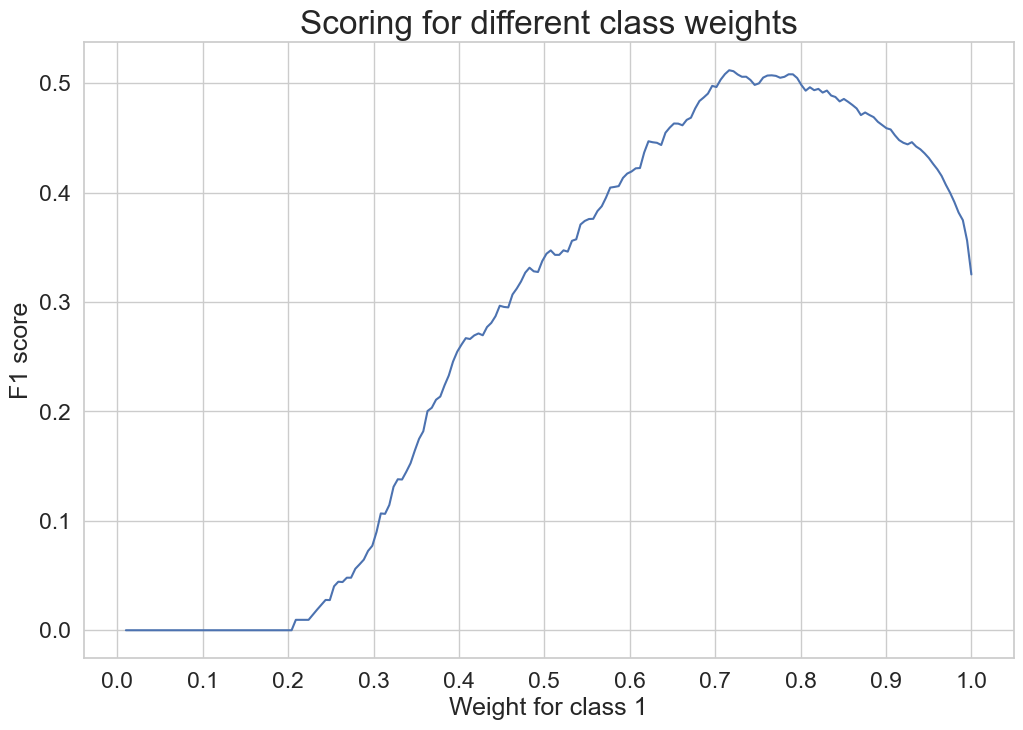

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(data= weigh_data, x = 'weight', y ='score')

plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

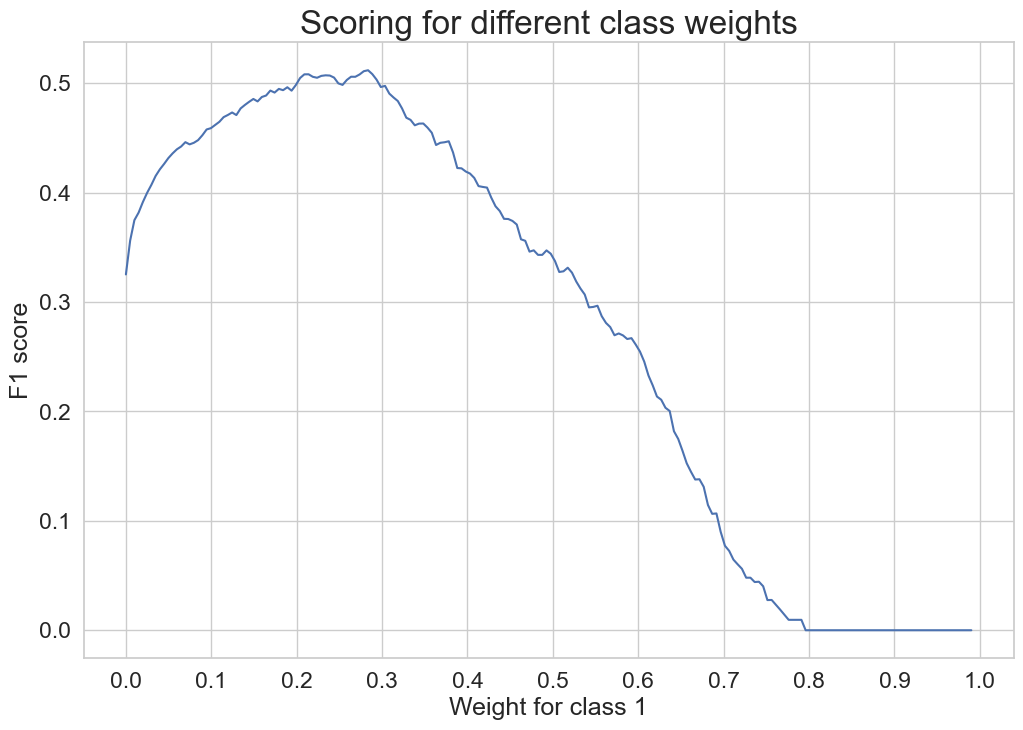

In [20]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (weights)})
sns.lineplot(data= weigh_data, x = 'weight', y ='score')

plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

The f1 score for the testing data: 0.4425531914893617


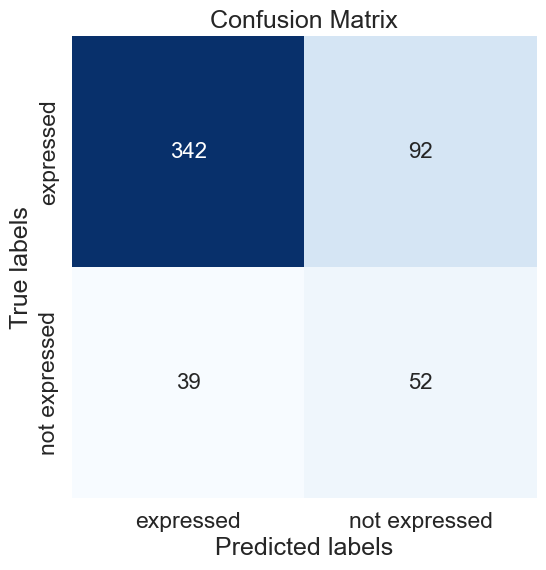

In [21]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.25, 1: 0.75})
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)

 The confusion matrix also shows that from the previous model, we are able to predict class 0 much better but at the cost of misclassification of our class 1

In [22]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_test))

Accuracy: 0.7504761904761905


# Random Forest

In [23]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


# standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Separating out the features
x = df.drop(['trial_status', 'trial_sequence'],axis=1).values

# Separating out the target (labels)
y = df.loc[:,['trial_status']].values
y = LabelEncoder().fit(y).transform(y)

# Standardizing the features
x = StandardScaler().fit_transform(x)


C:\Users\kgqr995\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kgqr995\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [24]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [25]:
n_samples, n_features = x.shape
print("No. of samples = %d" % n_samples)
print("No. of features = %d" % n_features)

No. of samples = 2621
No. of features = 39


The f1 score for the testing data: 0.2837837837837838


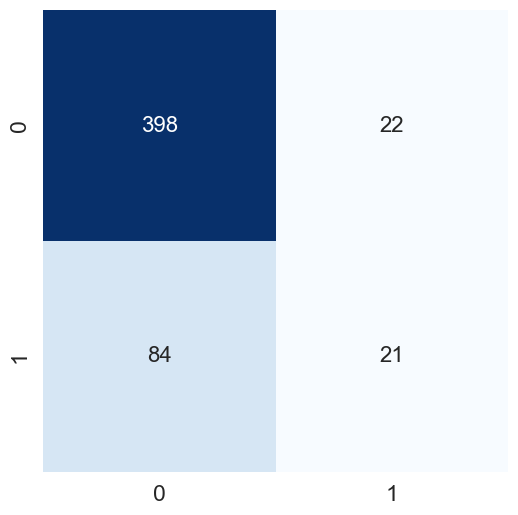

In [26]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Import Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 80% training and 20% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)


#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

pred_test=clf.predict(X_test)



from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

# Function to create a confusion matrix 
def conf_matrix(y_test, pred_test):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Calling function 
conf_matrix(y_test, pred_test)

In [28]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred_test))


Accuracy: 0.7980952380952381


The f1 score for the testing data: 0.27906976744186046


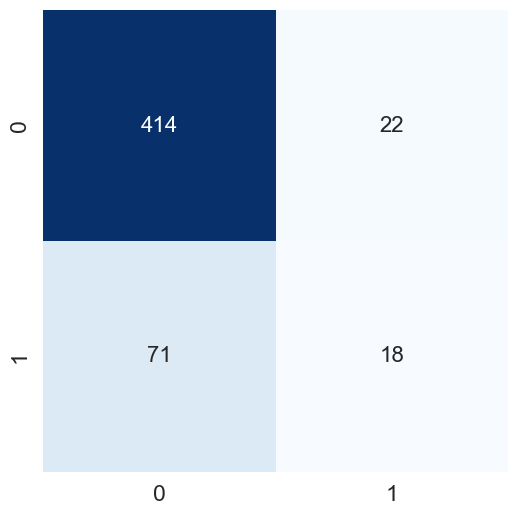

In [ ]:


#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Import Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 80% training and 20% test

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, class_weight= "balanced")


#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

pred_test=clf.predict(X_test)


#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

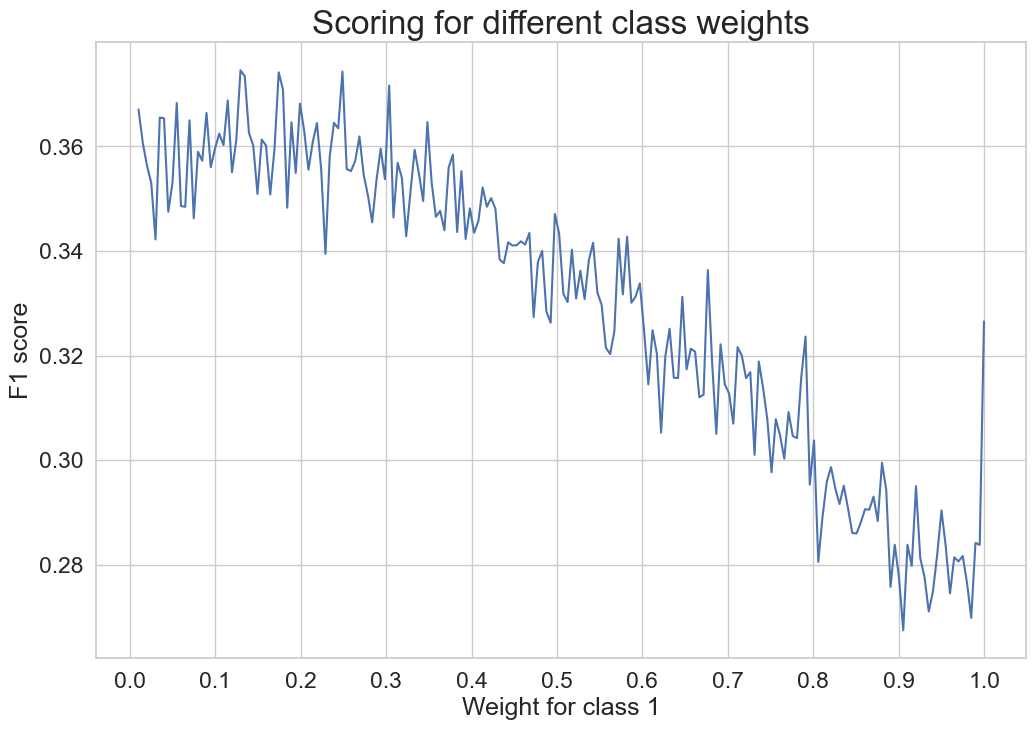

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
clf=RandomForestClassifier(n_estimators=100)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= clf, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(data= weigh_data, x = 'weight', y ='score')

plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

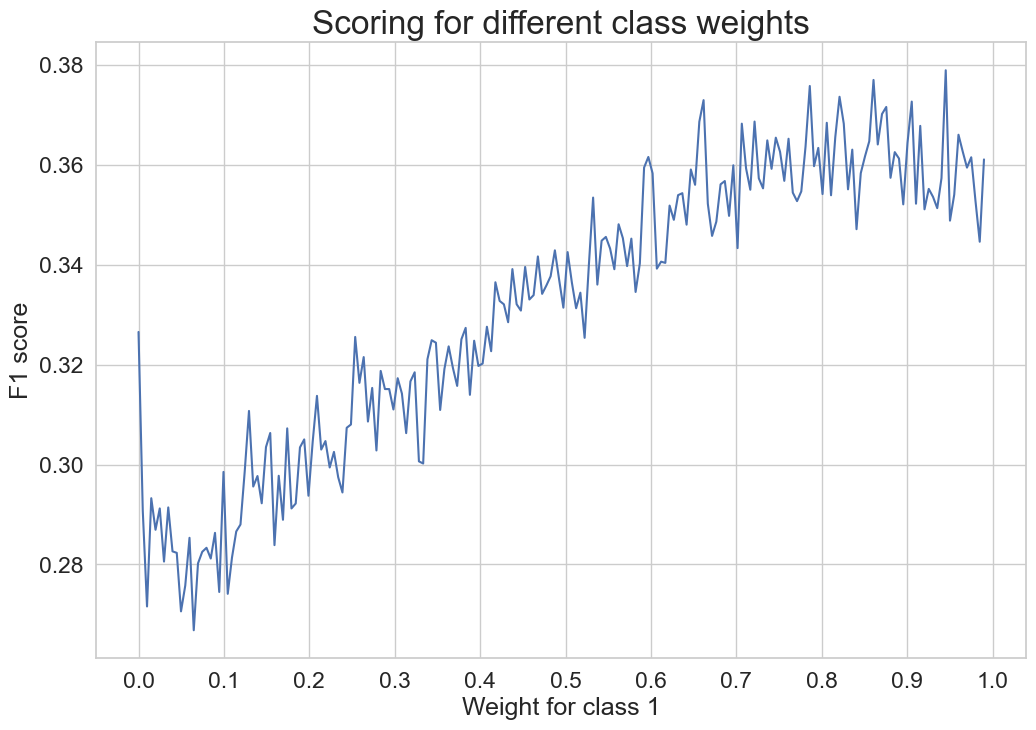

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
clf=RandomForestClassifier(n_estimators=100)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= clf, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (weights)})
sns.lineplot(data= weigh_data, x = 'weight', y ='score')

plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

The f1 score for the testing data: 0.49253731343283585


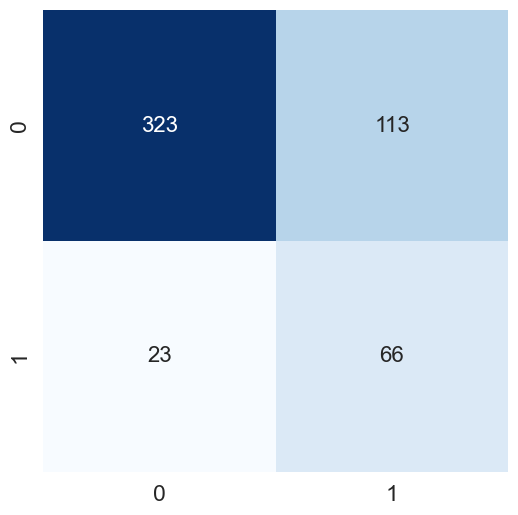

In [ ]:
#importing and training the model
# https://datascience.stackexchange.com/questions/11564/how-does-class-weights-work-in-randomforestclassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
clf=RandomForestClassifier(n_estimators=100, class_weight={})

lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.25, 1: 0.95})
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
conf_matrix(y_test, pred_test)